# CREDIT CARD FRAUD DETECTION

> __신용카드 부정 사용자 검출__

- fraud : 사기, 분식, 부정, 조작, 위조

- 참고: https://www.kaggle.com/code/ohseokkim/creditcard-fraud-balance-is-key-feat-pycaret

<br></br>

## ◾ Dataset

- [Download CREDIT CARD FRAUD DETECTION Dataset](https://www.kaggle.com/datasets/MLG-ULB/CREDITCARDFRAUD)

</br>

### --▶ 데이터 읽기

In [1]:
import pandas as pd

raw_data = pd.read_csv("D:\zbDS\Project\Part7_ML\dataset\creditcard.csv")
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


</br>

### --▶ 데이터 특성

- 데이터의 특성은 여러 이유로 이름이 감춰져 있다.

- 데이터 라벨의 불균형이 정말 심하다. --> fraud rate = 0.17%

In [2]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
fraud_rate = raw_data['Class'].value_counts()[1] / len(raw_data) * 100
print(f"Fraud Rate of the dataset is {round(fraud_rate, 2)} %")

Fraud Rate of the dataset is 0.17 %


In [5]:
raw_data['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [54]:
# !pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB 325.1 kB/s eta 0:00:25
    --------------------------------------- 0.1/7.9 MB 1.0 MB/s eta 0:00:08
   --- ------------------------------------ 0.6/7.9 MB 4.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.9 MB 5.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/7.9 MB 6.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/7.9 MB 8.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/7.9 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.9 MB 9.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.9 MB 9.3 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/7.9 MB 9.5 MB/s eta 0:00:01
   -------------------------- -

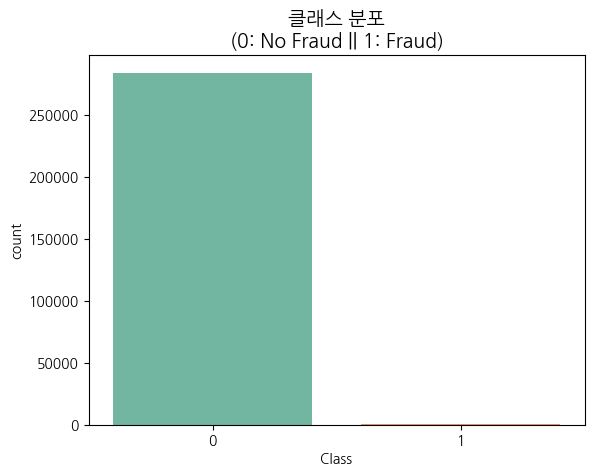

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

sns.countplot(x="Class", data=raw_data, hue='Class', legend=False, palette='Set2')
plt.title("클래스 분포\n(0: No Fraud || 1: Fraud)", fontsize=14) # Class Distributions
plt.show()

</br>

### --▶ 데이터 분리

1. $~$ 일단 데이터를 features **X**와 label **y**로 나눈다.

2. $~~\cal D_{\text{train}} \,:\, \cal D_{\text{test}}\,$로 데이터를 분리한다.

3. $~$ 분리한 데이터의 불균형 정도가 얼마나 되는지 확인해 본다. </br>
	$~~~\dashrightarrow~$ stratify 설정이 결과에 잘 반영되어 있는지 확인하는 것이다.

In [7]:
# 1.

X = raw_data.iloc[:, 1:-1] # raw_data.drop(['Time','Class'], axis = 1)
y = raw_data.iloc[:, -1] # raw_data['Class']

X.shape, y.shape

((284807, 29), (284807,))

In [8]:
# 2.

from sklearn.model_selection import train_test_split

# Data의 불균형성이 매우 크므로 stratify=y 설정이 중요하다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [9]:
# 3.

import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [10]:
np.unique(y_train, return_counts=True)[1] / len(y_train) * 100

array([99.8274513,  0.1725487])

In [11]:
np.unique(y_train, return_counts=True)[1][1] / len(y_train) * 100

0.17254870488152324

In [12]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([85295,   148], dtype=int64))

In [13]:
np.unique(y_test, return_counts=True)[1][1] / len(y_test) * 100
#--> Data의 Fraud 비율과 비슷한 것을 확인할 수 있다.

0.17321489179921118

<br></br>

## ◾ 1st. Trial - 4 Models

### --▶ Utility 함수 1, 2 생성

- 자주 사용하는 기능을 함수화 한다.<br></br>

1. $~$ `get_clf_scores` $~\dashrightarrow~$ 분류기의 성능을 반환하는 함수

2. $~$ `print_clf_eval` $~\dashrightarrow~$ 모델의 성능을 출력하는 함수

In [14]:
# Function 1.

from sklearn.metrics import (
	accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

def get_clf_scores(y_test, pred):
    acc = accuracy_score(y_test, pred)
    precis = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, precis, recall, f1, auc

In [15]:
# Function 2.

from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_scores(y_test, pred)
    
    print('《confusion matrix》')
    print(confusion)
    print('='*25)
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

### --▶ Logistic Regression

- recall이 0.5946이므로 실제 사기 데이터에서 60% 밖에 검출을 못한 것임. $~\dashrightarrow~$ 성능이 안좋음.

- Test Data에서 Fraud(Class==1) 개수는 148개(60+88) 였다. 그 중 60개를 틀렸다.

In [16]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

《confusion matrix》
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889
Recall: 0.5946, F1: 0.7126, AUC: 0.7972


### --▶ Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

《confusion matrix》
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833
Recall: 0.7162, F1: 0.7910, AUC: 0.8580


### --▶ Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

《confusion matrix》
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565
Recall: 0.7432, F1: 0.8365, AUC: 0.8716


### --▶ LightGBM

> Gradient Boosting Machine

- Use "verbose= False" in "fit" method. ❌
- Use "verbose= -100" when you call the classifier. ⭕

In [19]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, verbose=-1)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

《confusion matrix》
[[85289     6]
 [   34   114]]
Accuracy: 0.9995, Precision: 0.9500
Recall: 0.7703, F1: 0.8507, AUC: 0.8851


👉 Fraud를 검출하는 모델 성능이 점점 좋아졌다.

- Logistic Reg.(60, 0.5946) --> Decision Tree(42, 0.7162) --> Random Forest(38, 0.7432) --> LightGBM(34, 0.7703)<br></br>


👉 여기서 Recall과 Precision의 의미는?

- 은행 입장에서는 Recall이 좋을 것이고,
- 사용자 입장에서는 Precision이 좋겠지(???)

- 왜?<br></br>


### --▶ Utility 함수 3, 4, 5 생성

3. $~$ `get_result` $~\dashrightarrow~$ 모델과 데이터를 주면 성능을 출력하는 함수

4. $~$ `get_results_df` $~\dashrightarrow~$ 여러 가지 모델의 성능을 정리해서 pandas.DataFrame으로 반환하는 함수

5. $~$ `draw_roc_curve` $~\dashrightarrow~$ 모델별 ROC 커브를 그려주는 함수

In [20]:
# Function 3.

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_scores(y_test, pred)

In [21]:
# Function 4.

def get_results_df(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'F1', 'roc_auc']
    
    results = []
    for model in models:
        results.append(get_result(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(results, columns=col_names, index=model_names)

In [22]:
# Function 5.

from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
    
    plt.plot([0,1], [0,1], 'k--', label='random guess')
    plt.title('ROC curve')
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

### --▶ 4개의 분류 모델을 한 번에~

- 4개의 분류 모델을 한 번에 표로 정리

In [23]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results_df = get_results_df(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results_df

Fit time : 116.16622686386108


,accuracy,precision,recall,F1,roc_auc
LogisticReg.,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


👉 확실히 앙상블 계열의 성능이 우수하다.

- 불균형이 심한 데이터인 경우 Accuracy는 성능을 평가할 지표로서 그 의미가 매우 약하다.

<br></br>

## ◾ 2nd. Trial - Scaling

- 데이터를 Scale Preprocessing으로 정리한 후 다시 도전~!!

- raw_data의 Amount 컬럼을 확인해 보면 특정 대역에 컬럼의 분포가 아주 많다.

- Amount는 신용카드 사용금액이다.

- `sns.displot` - [공식 문서](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

In [41]:
raw_data['Amount'].value_counts().max()

13688

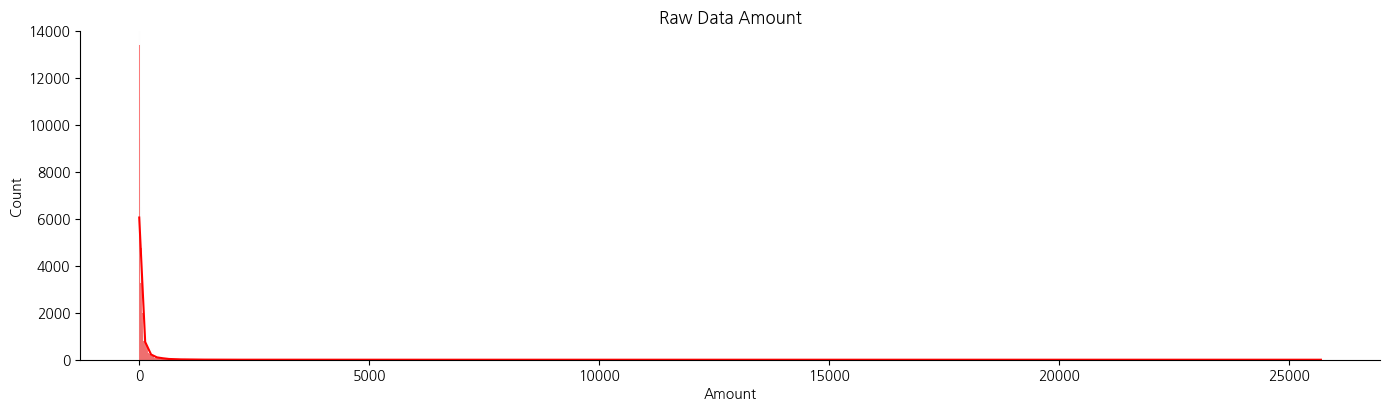

In [42]:
sns.displot(data=raw_data, x='Amount', kde=True, color='r', height=4, aspect=3.5);
plt.ylim(top=14000)
plt.title('Raw Data Amount')
plt.show()

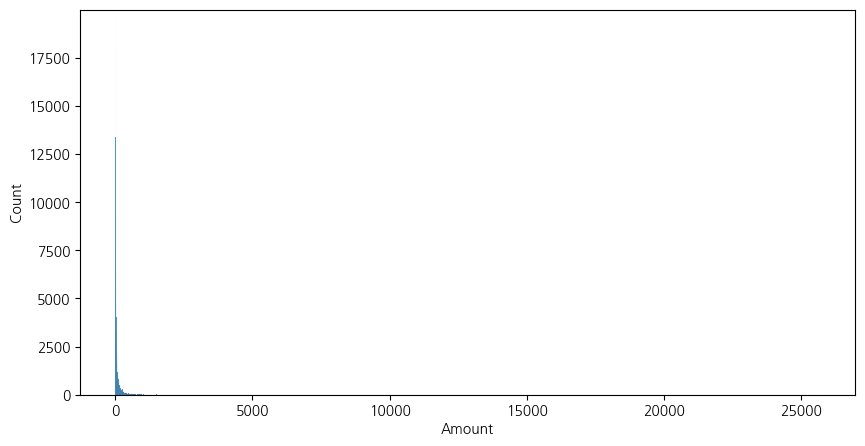

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data=raw_data, x='Amount');
plt.yticks(np.arange(0, 20000, 2500))
plt.ylim(top=20000)
plt.show()

### 🎫 StandardScaler

- Amount 컬럼의 분포가 특정 대역에 몰려있는 경향이 있으므로 Amount 컬럼에 StandardScaler를 적용해 전처리한다.

In [29]:
raw_data['Amount'].values.shape

(284807,)

In [30]:
raw_data['Amount'].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_amount = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

copy_data = raw_data.iloc[:, 1:-2]
copy_data['Scaled_Amount'] = std_amount
copy_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [39]:
copy_data['Scaled_Amount'].value_counts().max()

13688

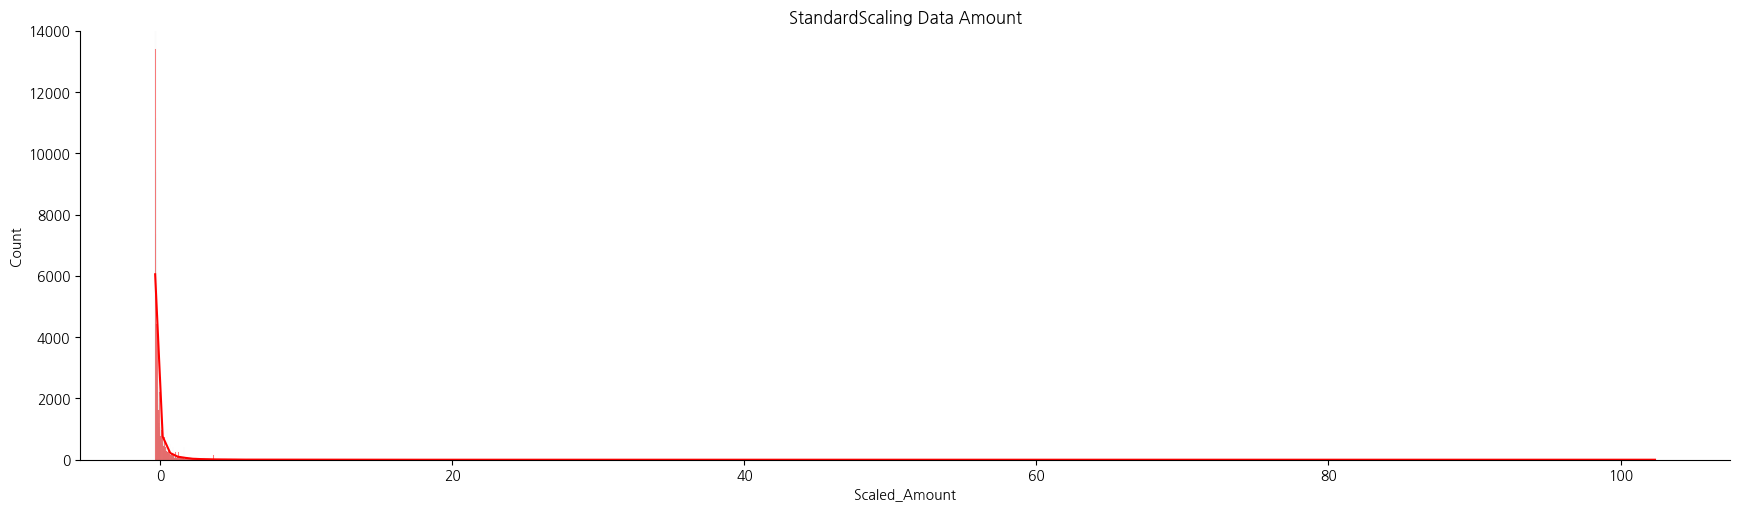

In [44]:
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

sns.displot(data=copy_data, x='Scaled_Amount', kde=True, color='r', height=5, aspect=3.5);
plt.ylim(top=14000)
plt.title("StandardScaling Data Amount")
plt.show()

### --▶ Model 별로 학습

- 데이터를 다시 나누고 모델 별로 다시 평가하다.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(copy_data, y, test_size=0.3, random_state=13, stratify=y)

start_time = time.time()
results_df = get_results_df(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results_df

Fit time : 122.23119640350342


,accuracy,precision,recall,F1,roc_auc
LinearReg.,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


### --▶ ROC 커브 per Model

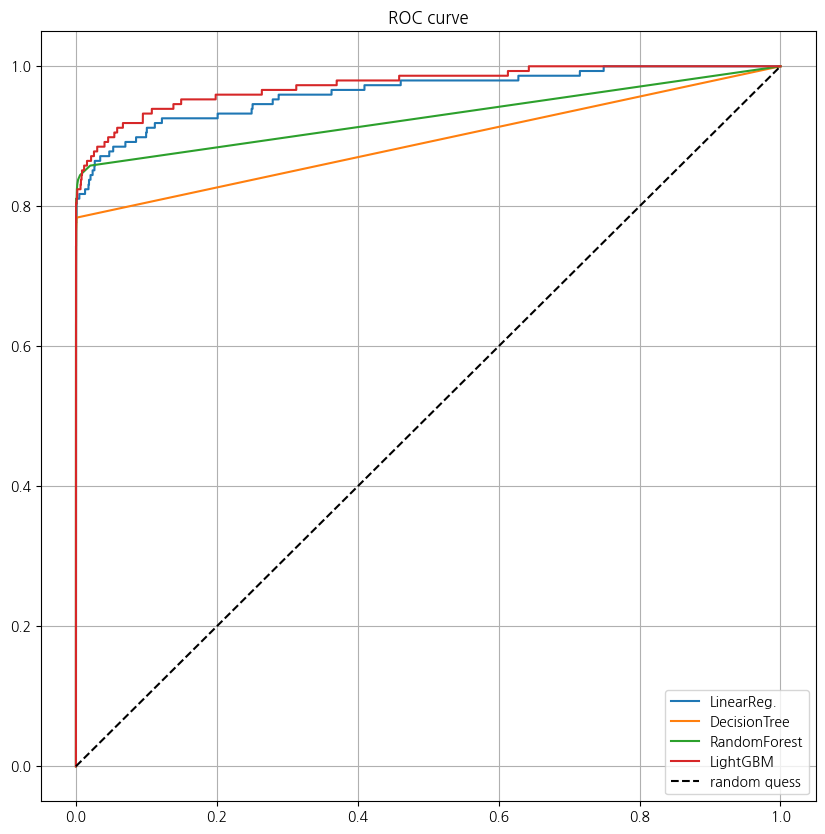

In [77]:
draw_roc_curve(models, model_names, X_test, y_test)

### 🎫 LogScale

- 또 다른 시도로 Log Scale 전처리 해본다.

- `np.log1p()` = __log(1+x)__ 활용

- 로그는 $x$가 커질수록 $y$ 값의 Scale을 억제하는 효과가 있다.

- 분포가 변하는 것을 볼 수 있다. (로그 변환 결과 분포가 훨씬 균일해짐)

In [ ]:
# log(1+x) 그래프 그려서 확인

In [78]:
log_amount = np.log1p(raw_data['Amount'])

copy_data['Scaled_Amount'] = log_amount
copy_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


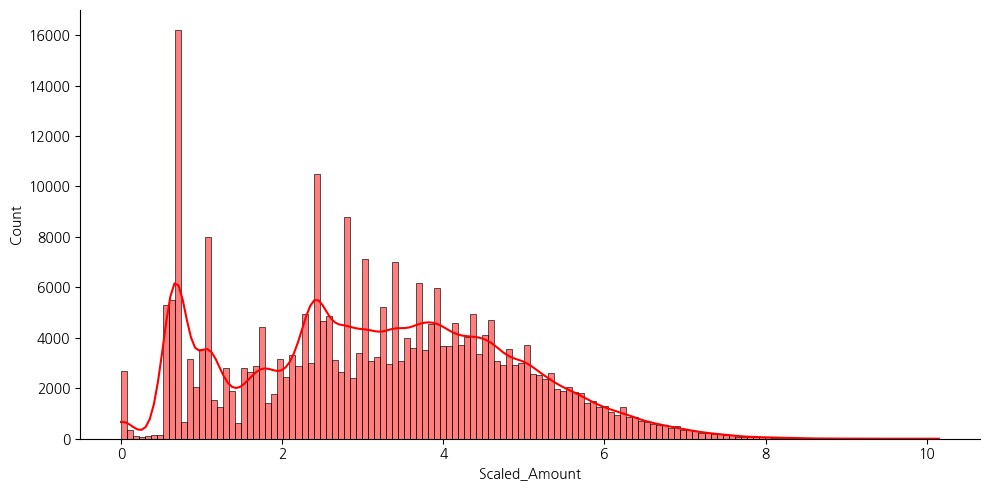

In [80]:
sns.displot(x=copy_data['Scaled_Amount'], kde=True, color='r', height=5, aspect=2);

### --▶ 다시 성능 확인

In [81]:
X_train, X_test, y_train, y_test = train_test_split(copy_data, y, test_size=0.3, random_state=13, stratify=y)

start_time = time.time()
results_df = get_results_df(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results_df

Fit time : 131.70908546447754


,accuracy,precision,recall,F1,roc_auc
LinearReg.,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


👉 미세한 변화가 보이지만 확실한 변화는 관찰되지 않는다.

</br>

### --▶ ROC 커브 per Model

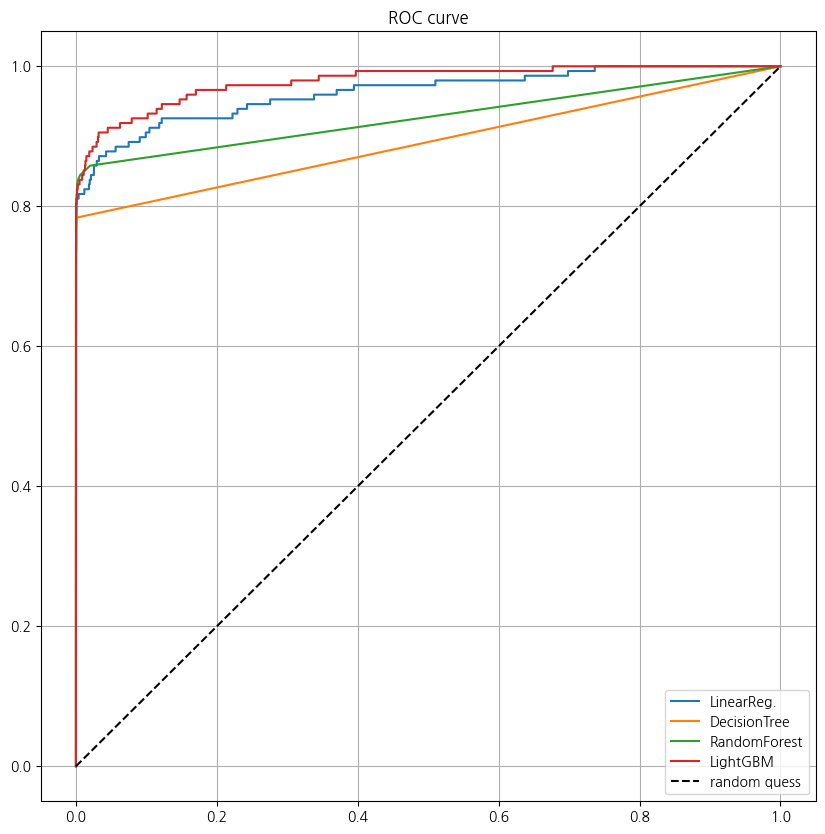

In [82]:
draw_roc_curve(models, model_names, X_test, y_test)


<br></br>

## ◾ 3rd. Trial - Outlier

- 데이터의 Outlier(특이값)을 정리한 후 다시 도전~!

- 특이 데이터를 확인한다.<br></br>


### --▶ Outlier 확인

- V5,6,7, V20,21,23에서 특이값이(이상치가) 확인된다.

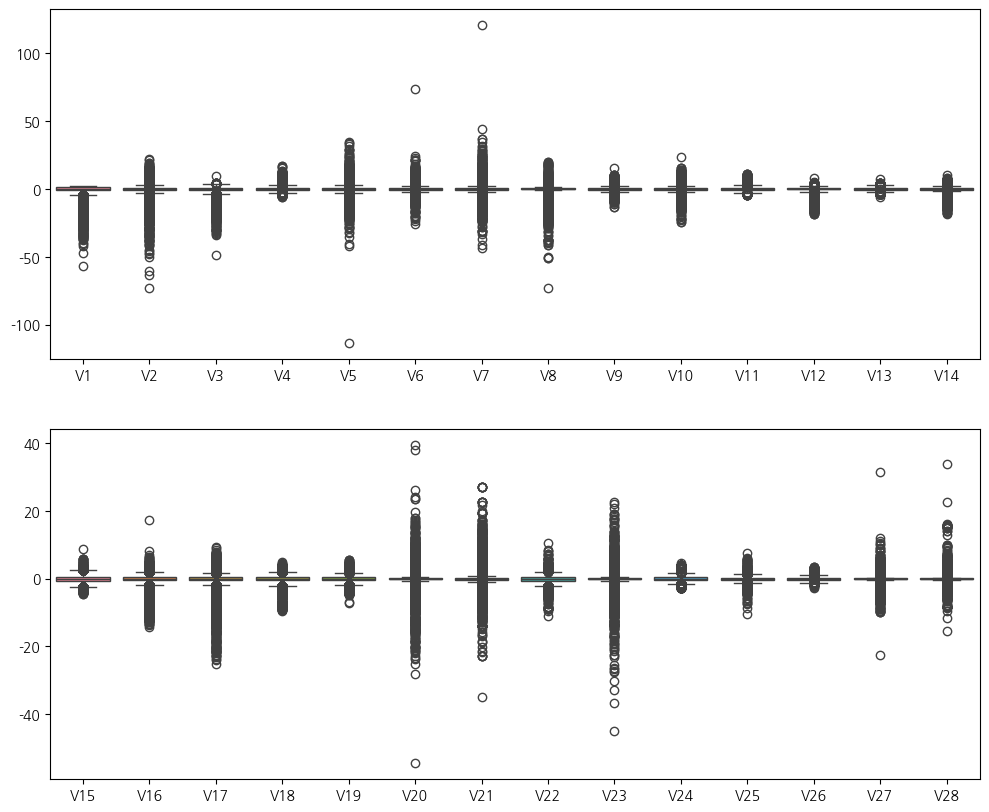

In [106]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
sns.boxplot(X.iloc[:, :14], ax=ax[0])
sns.boxplot(X.iloc[:, 14:-1], ax=ax[1])
plt.show()

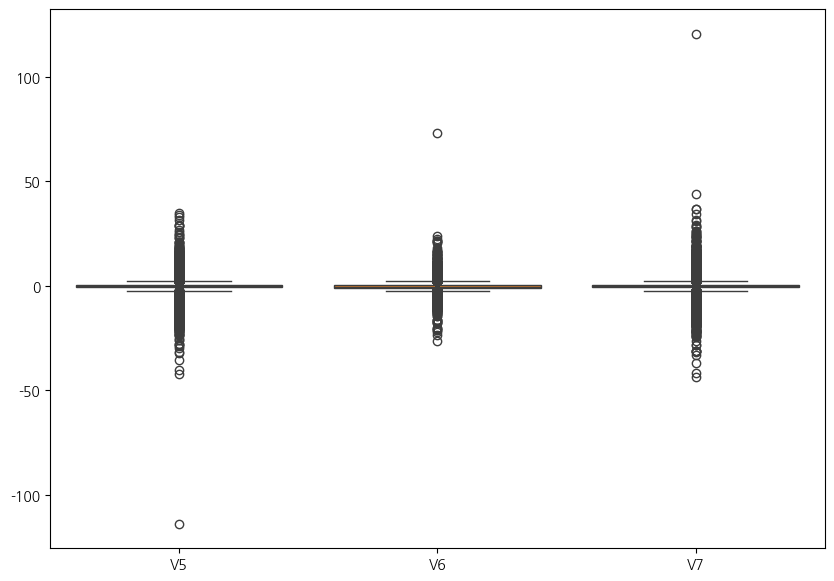

In [107]:
plt.figure(figsize=(10,7))
sns.boxplot(data=raw_data[['V5', 'V6', 'V7']]);

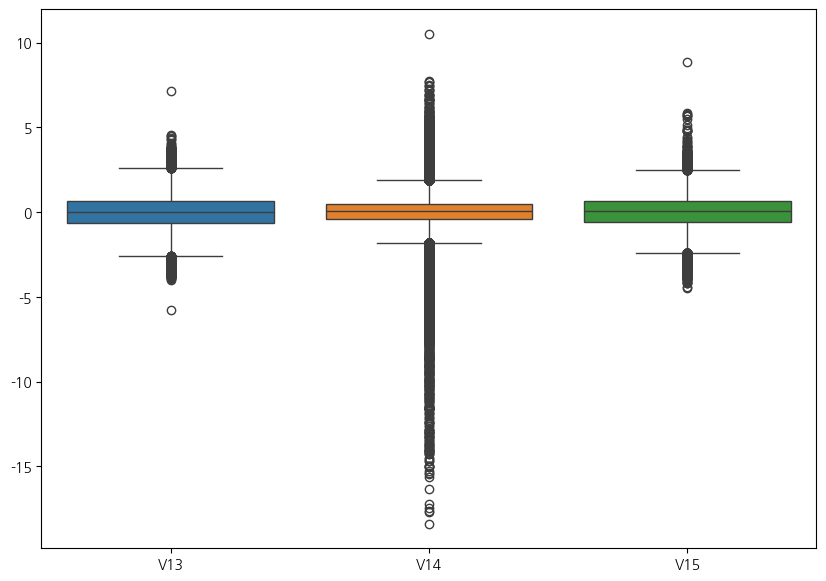

In [108]:
plt.figure(figsize=(10,7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']]);

### --▶ Outlier 찾기 : 함수 생성

- Outlier를 정리하기 위해 Outlier의 인덱스를 파악하는 함수 생성

In [117]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [118]:
# Outlier 찾기

outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
outlier_index

[9487, 41943]

### --▶ Outlier 제거

- Outlier를 제거하고 데이터를 나눈다.

In [89]:
copy_data.shape

(284807, 29)

In [90]:
# Outlier 제거

copy_data.drop(outlier_index, axis=0, inplace=True)
copy_data.shape

(284803, 29)

In [91]:
copy_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


### --▶ Data Split

In [93]:
X = copy_data

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

### --▶ 다시 성능 확인

In [94]:
%%time

start_time = time.time()
results_df = get_results_df(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results_df

Fit time : 114.15477919578552
CPU times: total: 12min 7s
Wall time: 1min 54s


,accuracy,precision,recall,F1,roc_auc
LinearReg.,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


### --▶ ROC 커브 per Model

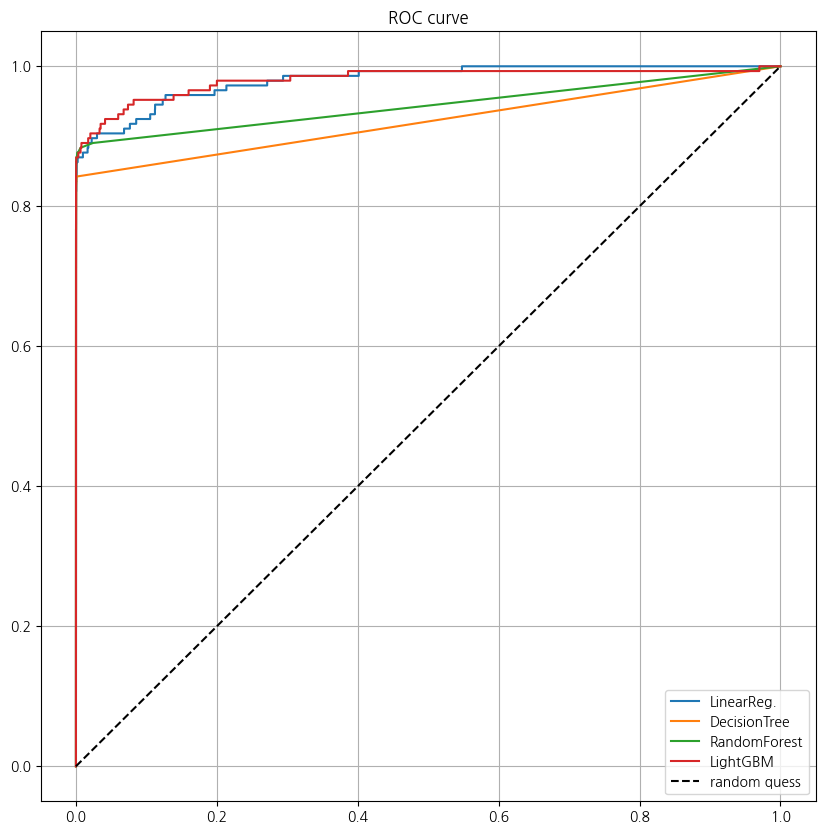

In [95]:
draw_roc_curve(models, model_names, X_test, y_test)

### 🔎 Class==0 Outlier 제거

- 이상치가 많았던 V20,21,23을 대상으로 한다.

In [ ]:
import numpy as np

def get_C0_outlier(df=None, column=None, weight=1.5):
    '''
    Not Fraud로 라벨링 된 것(Class==0) 중 이상치들은 사실 Fraud로 분류되어야 하지 않았을까???
    '''
    fraud = df[df['Class']==0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index.tolist()

In [ ]:
outlier_index = []
for col in ['V20','V21','V23']:
    outlier_index.extend(get_C0_outlier(raw_data, col))

len(outlier_index)

60333

In [ ]:
outliers_idx = list(set([i for i in outlier_index[::1]])) # 중복된 index 제거
len(outliers_idx)

38892

In [ ]:
new_df = raw_data.drop(outlier_index)

### --▶ LogScale & Data Split

In [127]:
new_df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [130]:
log_amount = np.log1p(new_df['Amount'])

new_df['Amount'] = log_amount
new_df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.794216,0


In [132]:
X = new_df.iloc[:, 1:-1]
y = new_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

### --▶ Models Evaluation

In [133]:
%%time

start_time = time.time()
results_df = get_results_df(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time :', time.time() - start_time)
results_df

Fit time : 103.4073486328125
CPU times: total: 11min 24s
Wall time: 1min 43s


,accuracy,precision,recall,F1,roc_auc
LinearReg.,0.999593,0.946154,0.842466,0.891304,0.921185
DecisionTree,0.999675,0.955224,0.876712,0.914286,0.938315
RandomForest,0.999729,0.963235,0.897260,0.929078,0.948596
LightGBM,0.999634,0.983740,0.828767,0.899628,0.914370


### --▶ ROC Curve per Model

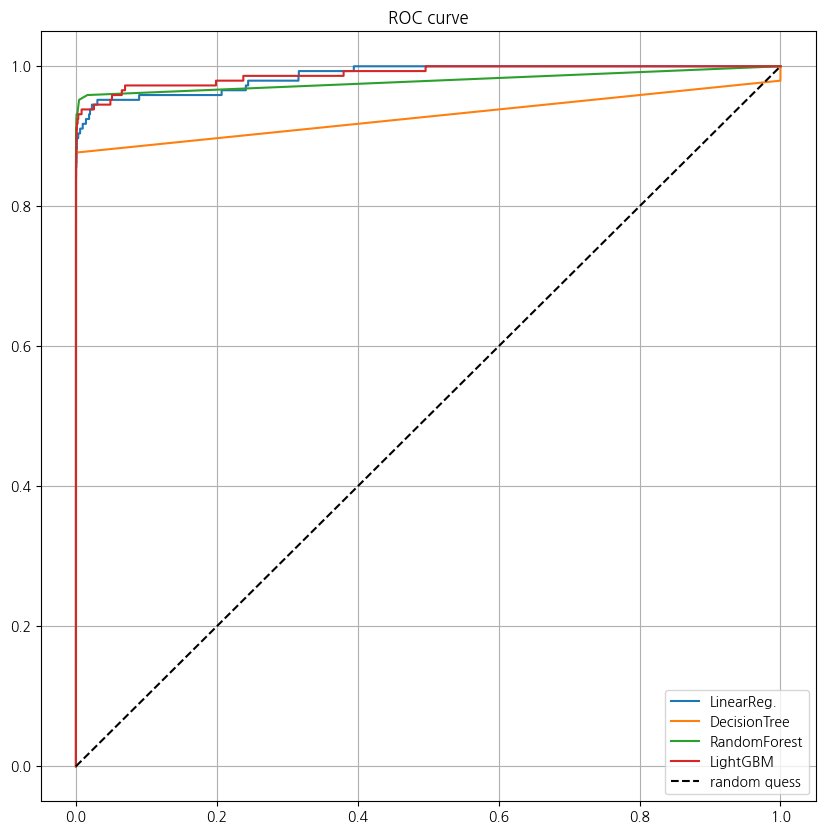

In [134]:
draw_roc_curve(models, model_names, X_test, y_test)

<br></br>

## ◾ 4th. Trial - SMOTE Oversampling

1. $~$ 오버샘플링의 대표적인 방법인 **SMOTE**(Synthetic Minority Over-sampling Technique)을 사용한다.

	- KNN 기법을 사용해 작은 클래스의 데이터를 늘려준다.<br></br>

2. $~$ **SVMSMOTE**로 결정경계 주변의 미묘한 패턴을 잡아내어 소수클래스의 오버샘플링을 해주고 성능을 평가해 본다.

In [96]:
# !pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/257.7 kB 363.1 kB/s eta 0:00:01
   ---------------------------------------  256.0/257.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 1.2 MB/s eta 0:00:00


### 🎫 SMOTE 적용

- 데이터 증강 효과를 확인한다.

In [98]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [99]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [100]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

### --▶ SMOTE 결과

In [101]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


### --▶ 다시 성능 확인

In [102]:
%%time

start_time = time.time()
results_df = get_results_df(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time :', time.time() - start_time)
results_df

Fit time : 228.87912797927856
CPU times: total: 23min 56s
Wall time: 3min 48s


,accuracy,precision,recall,F1,roc_auc
LinearReg.,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.046048,0.869863,0.087466,0.919509
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999532,0.873239,0.849315,0.861111,0.924552


👉 recall이 확실히 좋아진다.

</br>

### --▶ ROC 커브 per Model

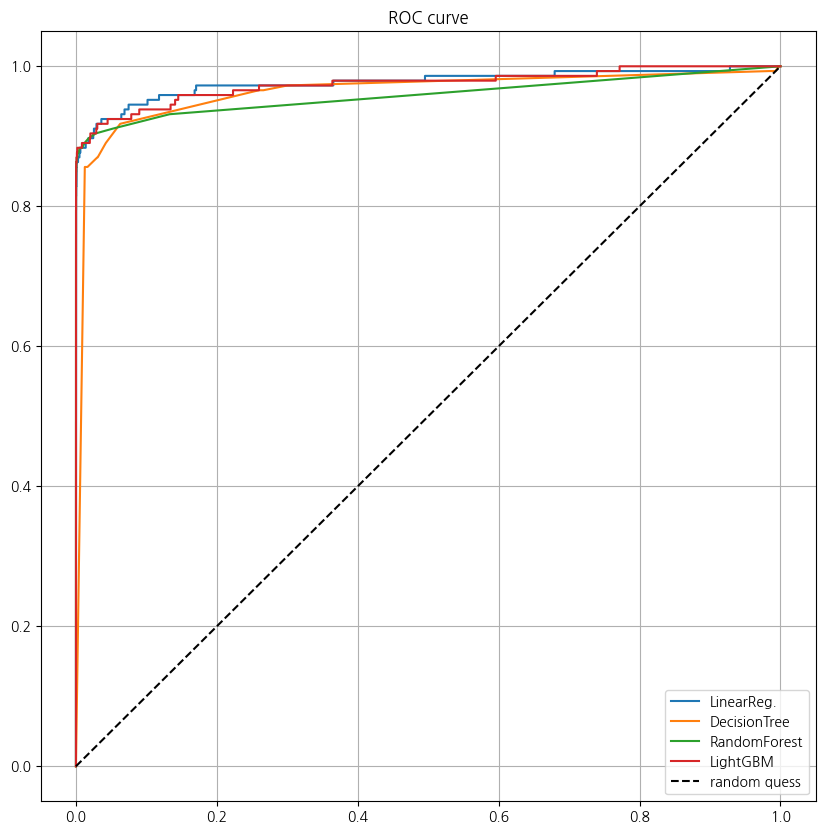

In [103]:
draw_roc_curve(models, model_names, X_test, y_test)

### 🎫 SVMSMOTE 적용

In [137]:
X = raw_data.iloc[:, 1:-1] # raw_data.drop(['Time','Class'], axis = 1)
y = raw_data.iloc[:, -1] # raw_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

X_train.shape, y_train.shape

((199362, 29), (199362,))

In [136]:
from imblearn.over_sampling import SVMSMOTE

# SVMSMOTE를 사용하여 소수클래스 : 다수클래스를 0.55 : 1의 비율로 오버샘플링
svmsmote = SVMSMOTE(sampling_strategy=0.55, random_state=13, m_neighbors=5, n_jobs=-1)
X_train_over, y_train_over = svmsmote.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((308481, 29), (308481,))

### --▶ SMOTE 결과

In [138]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 109461], dtype=int64))


### --▶ 다시 성능 확인

In [139]:
%%time

start_time = time.time()
results_df = get_results_df(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time :', time.time() - start_time)
results_df

Fit time : 155.19765734672546
CPU times: total: 16min 37s
Wall time: 2min 35s


,accuracy,precision,recall,F1,roc_auc
LinearReg.,0.995389,0.253968,0.876712,0.393846,0.936152
DecisionTree,0.995318,0.250000,0.869863,0.388379,0.932698
RandomForest,0.999532,0.878571,0.842466,0.860140,0.921133
LightGBM,0.999602,0.905797,0.856164,0.880282,0.928006


### --▶ ROC 커브 per Model

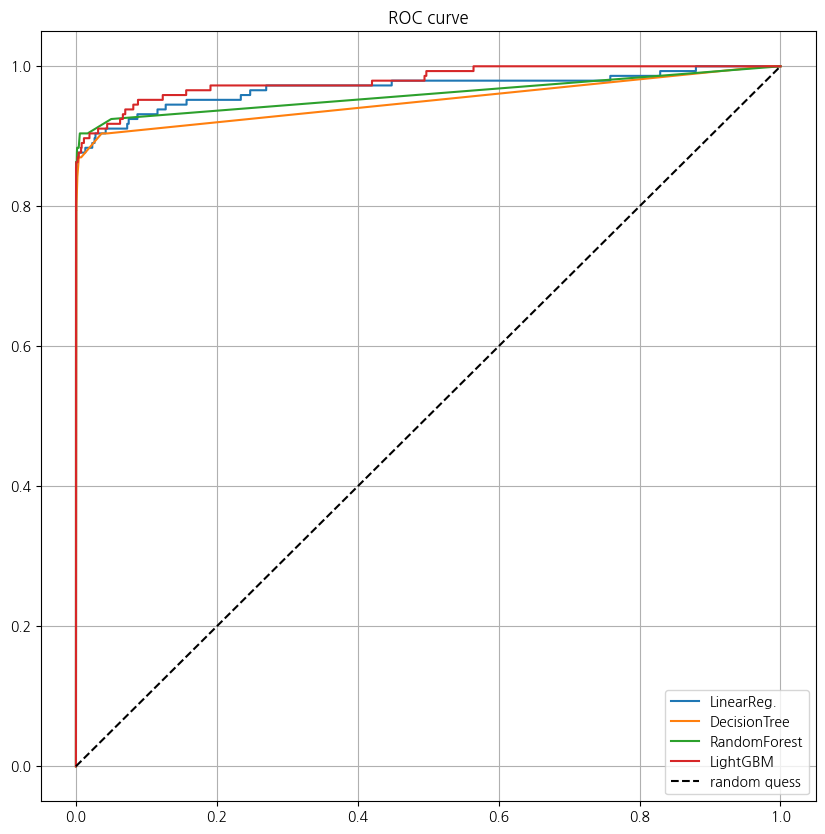

In [140]:
draw_roc_curve(models, model_names, X_test, y_test)

👉 결론: 

🔹 SVMSMOTE를 사용하여 $\text{소수클래스} : \text{다수클래스}$를 $0.55 : 1\,$의 비율로 오버샘플링한 성능평가 결과

- V20,V21,V23칼럼의 Class0인 것의 Outlier 제거한 모델

- 스케일이 혼자 많이 달랐던 Amount열을 standardscaling한 모델

- Amount열의 분포를 고르게하는 동시에 스케일링도 한 log1p적용 모델

- V20, V21, V23칼럼의 Class0인 것의 Outlier 제거한 후 Amount열을 로그변환한 모델

- 그 전 모델 중 모든 지표에서 가장 성능이 높았던 V20,V21,V23칼럼 Outlier제거 모델과 비교하면 </br>
	SVMSMOTE로 소수클래스를 오버샘플링한 모델의 auc score는 가장 높았으나

	- 로지스틱 회귀에서의 precision이 굉장히 낮아져 f1_score도 굉장히 낮았으며
	- RamdomForest의 경우 precision이 1.2정도 하락하고 recall이 0.1정도 올랐으나 f1은 떨어졌다 auc score는 0.05 증가
	- XGBM의 경우 f1은 0.7정도 하락했고 auc score은 0.1 증가
	- LGBM의 경우 f1은 0.27정도 하락했고 auc score은 0.1 증가함